In [11]:
import ase.io
import pandas as pd
import ampopt
from ampopt.study import get_study
from ampopt.utils import format_params
from optuna import visualization as viz
import matplotlib.pyplot as plt

## Potential Energy Histograms

<AxesSubplot: ylabel='Frequency'>

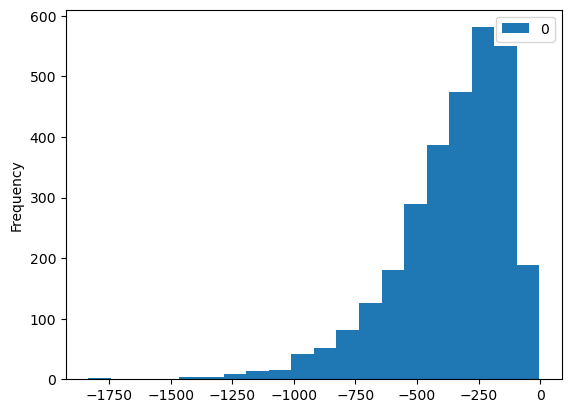

In [2]:
small_data = ase.io.Trajectory("../data/oc20_3k_train.traj")
pd.DataFrame([d.get_potential_energy() for d in small_data]).plot(kind='hist', bins=20)

<AxesSubplot:ylabel='Frequency'>

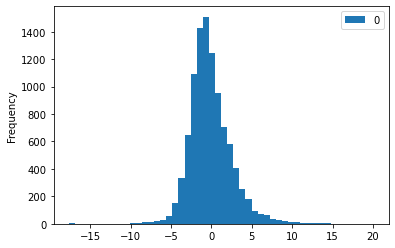

In [5]:
train_data = ase.io.read("../data/oc20_50k_train.extxyz", ":")
pd.DataFrame([d.get_potential_energy() for d in train_data[::5]]).plot(kind='hist', bins=50)

Steps to create `oc20_50k_alex.extxyz`:

1. Download 200K split of S2EF task https://github.com/Open-Catalyst-Project/ocp/blob/main/DATASET.md
2. Decompress: `tar -xf s2ef_train_200K.tar`
3. Decompress individual files: `xz -d s2ef_train_200K/s2ef_train_200K/*.extxyz.xz`
4. Combine the first 10 files: `cd s2ef_train_200K/s2ef_train_200K` then
    ```python
    import ase.io
    from tqdm import tqdm
    atoms_lists = [ase.io.read(f"{i}.extxyz", ":") for i in tqdm(range(10))]
    atoms = [a for al in atoms_lists for a in al]
    ase.io.write("oc20_50k_alex.extxyz", tqdm(atoms))
    ```

<AxesSubplot:ylabel='Frequency'>

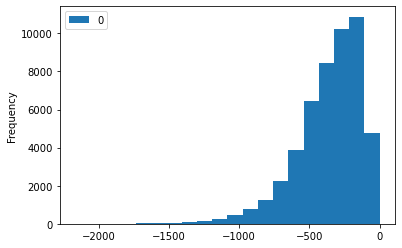

In [3]:
alex_data = ase.io.read("../data/oc20_50k_alex.extxyz", ":")

pd.DataFrame([d.get_potential_energy() for d in alex_data]).plot(kind='hist', bins=20)

## Sampling and Pruning

In [3]:
# comparing samplers

for sampler in ["CmaEs", "TPE", "Random"]:
    for _ in range(3):
        ampopt.tune(
            study=f"{sampler.lower()}-oc20-3k",
            trials=20,
            epochs=500,
            sampler=sampler,
            pruner="None",
            params=format_params(
                dropout_rate=0.0,
                gamma=1.,
                # lr=1e-3,
            ),
            data="../data/oc20_3k_train.lmdb",
        )

Running hyperparam tuning with:
 - study_name: cmaes-oc20-3k
 - dataset: ../data/oc20_3k_train.lmdb
 - n_trials: 20
 - sampler: CmaEs
 - pruner: None
 - num epochs: 500


[I 2022-10-09 04:13:18,967] A new study created in RDB with name: cmaes-oc20-3k
loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:  13%|▏|

 - params:
   - dropout_rate: 0.0
   - gamma: 1.0
CmaEsSampler
Results saved to ./checkpoints\2022-10-09-04-13-19-71c9df02-67ae-4816-b075-2a5c19e76661


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 7401 parameters
Loading skorch trainer


[I 2022-10-09 04:18:13,388] Trial 0 finished with value: 95.91544157146478 and parameters: {'num_layers': 17, 'num_nodes': 20, 'lr': 0.0038288599225124328}. Best is trial 0 with value: 95.9154.


Training completed in 292.18550658226013s
Results saved to ./checkpoints\2022-10-09-04-18-13-18bea672-fa5b-40e7-9534-682fa658cfe9


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 2355 parameters
Loading skorch trainer


[I 2022-10-09 04:21:44,564] Trial 1 finished with value: 105.02974357161779 and parameters: {'num_layers': 16, 'num_nodes': 11, 'lr': 0.00025662965320428203}. Best is trial 0 with value: 95.9154.
loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:   0%| |

Training completed in 209.9199619293213s
Results saved to ./checkpoints\2022-10-09-04-21-44-601061b7-2001-420f-9a39-7fd6c0bf9734


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 7833 parameters
Loading skorch trainer


[I 2022-10-09 04:26:53,647] Trial 2 finished with value: 98.5947482442858 and parameters: {'num_layers': 15, 'num_nodes': 22, 'lr': 8.047858475668461e-05}. Best is trial 0 with value: 95.9154.
loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:   0%| |

Training completed in 308.07035875320435s
Results saved to ./checkpoints\2022-10-09-04-26-53-adf22200-1086-4fb9-ac5b-1bf1786638bd


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 1881 parameters
Loading skorch trainer


[I 2022-10-09 04:30:19,144] Trial 3 finished with value: 99.26364447709355 and parameters: {'num_layers': 15, 'num_nodes': 10, 'lr': 0.004876954525857502}. Best is trial 0 with value: 95.9154.
loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:   0%| |

Training completed in 204.35402631759644s
Results saved to ./checkpoints\2022-10-09-04-30-19-7d6a69d0-3b1a-4e24-bd46-a4ae3db4a88a


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 3543 parameters
Loading skorch trainer


[I 2022-10-09 04:33:19,018] Trial 4 finished with value: 11687.066627966386 and parameters: {'num_layers': 6, 'num_nodes': 23, 'lr': 0.09771489812238231}. Best is trial 0 with value: 95.9154.


Training completed in 178.96576595306396s
Results saved to ./checkpoints\2022-10-09-04-33-19-4aa79d12-d713-4b7d-b41e-282604e9f009


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 5713 parameters
Loading skorch trainer


[I 2022-10-09 04:38:20,908] Trial 5 finished with value: 457.7037491066584 and parameters: {'num_layers': 20, 'num_nodes': 16, 'lr': 0.03264371425900009}. Best is trial 0 with value: 95.9154.
loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:   0%| |

Training completed in 300.87257146835327s
Results saved to ./checkpoints\2022-10-09-04-38-20-ea46cfc6-e450-44ef-afb4-0f910ddd7795


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 2905 parameters
Loading skorch trainer


[I 2022-10-09 04:42:10,842] Trial 6 finished with value: 111.4207938213506 and parameters: {'num_layers': 17, 'num_nodes': 12, 'lr': 0.00966299593198119}. Best is trial 0 with value: 95.9154.
loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:   0%| |

Training completed in 228.89500427246094s
Results saved to ./checkpoints\2022-10-09-04-42-10-7c195236-114a-4350-948f-0c2833bd5f05


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 2671 parameters
Loading skorch trainer


[I 2022-10-09 04:45:37,743] Trial 7 finished with value: 125.71905474999231 and parameters: {'num_layers': 10, 'num_nodes': 15, 'lr': 0.01363326381805546}. Best is trial 0 with value: 95.9154.
loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:   0%| |

Training completed in 205.6368510723114s
Results saved to ./checkpoints\2022-10-09-04-45-37-4040b71a-62ba-48ee-bf87-1408b7726bc6


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 4375 parameters
Loading skorch trainer


[I 2022-10-09 04:49:58,386] Trial 8 finished with value: 422.6840457788132 and parameters: {'num_layers': 12, 'num_nodes': 18, 'lr': 0.020668106628912834}. Best is trial 0 with value: 95.9154.
loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:   0%| |

Training completed in 259.42934250831604s
Results saved to ./checkpoints\2022-10-09-04-49-58-f483079b-cdcf-4fb5-81f9-a7fca1809532


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 13201 parameters
Loading skorch trainer


[I 2022-10-09 04:56:52,866] Trial 9 finished with value: 99.99325819659522 and parameters: {'num_layers': 20, 'num_nodes': 25, 'lr': 0.0005163823015777613}. Best is trial 0 with value: 95.9154.
loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:   0%| |

Training completed in 413.397581577301s
Results saved to ./checkpoints\2022-10-09-04-56-52-6e7c7b54-16fd-47df-8714-678bdc64be03


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 6259 parameters
Loading skorch trainer


[I 2022-10-09 05:01:22,091] Trial 10 finished with value: 100.17402769253282 and parameters: {'num_layers': 13, 'num_nodes': 21, 'lr': 0.00058316262343444}. Best is trial 0 with value: 95.9154.
loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:   0%| |

Training completed in 268.1697700023651s
Results saved to ./checkpoints\2022-10-09-05-01-22-fc711ef8-b478-4e13-ad45-18ec5a70d4b6


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 6259 parameters
Loading skorch trainer


[I 2022-10-09 05:05:56,726] Trial 11 finished with value: 92.0892053105986 and parameters: {'num_layers': 13, 'num_nodes': 21, 'lr': 0.007633787350909542}. Best is trial 11 with value: 92.0892.
loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:   0%| |

Training completed in 273.5450048446655s
Results saved to ./checkpoints\2022-10-09-05-05-56-f4f6305d-7def-460a-b84f-10a800aab204


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 6721 parameters
Loading skorch trainer


[I 2022-10-09 05:11:13,830] Trial 12 finished with value: 100.68161408567033 and parameters: {'num_layers': 14, 'num_nodes': 21, 'lr': 0.000551644436453891}. Best is trial 11 with value: 92.0892.
loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:   0%| |

Training completed in 316.14381885528564s
Results saved to ./checkpoints\2022-10-09-05-11-13-b38dea09-dc5f-4846-9abc-5f9936221cf6


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 4881 parameters
Loading skorch trainer


[I 2022-10-09 05:15:06,685] Trial 13 finished with value: 162.34861825122945 and parameters: {'num_layers': 11, 'num_nodes': 20, 'lr': 0.021339025895857313}. Best is trial 11 with value: 92.0892.
loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:   0%| |

Training completed in 231.48630118370056s
Results saved to ./checkpoints\2022-10-09-05-15-06-e901e154-4129-4c9c-8391-d48cbf0d7fc3


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 7183 parameters
Loading skorch trainer


[I 2022-10-09 05:19:46,479] Trial 14 finished with value: 90.61929541583814 and parameters: {'num_layers': 15, 'num_nodes': 21, 'lr': 0.0029398642877842282}. Best is trial 14 with value: 90.6193.
loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:   0%| |

Training completed in 278.744615316391s
Results saved to ./checkpoints\2022-10-09-05-19-46-3d475d56-8f83-4685-9e54-1c641ea44395


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 4717 parameters
Loading skorch trainer


[I 2022-10-09 05:24:05,751] Trial 15 finished with value: 196.22257438860134 and parameters: {'num_layers': 13, 'num_nodes': 18, 'lr': 0.010349493257282027}. Best is trial 14 with value: 90.6193.
loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:   0%| |

Training completed in 258.0835692882538s
Results saved to ./checkpoints\2022-10-09-05-24-05-d614051e-2edc-4221-bf41-83c9ce3b6155


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 7959 parameters
Loading skorch trainer


[I 2022-10-09 05:28:27,074] Trial 16 finished with value: 99.26129485045149 and parameters: {'num_layers': 14, 'num_nodes': 23, 'lr': 0.0002961641473962588}. Best is trial 14 with value: 90.6193.
loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:   0%| |

Training completed in 260.35447239875793s
Results saved to ./checkpoints\2022-10-09-05-28-27-d396ac6a-2d44-4208-beb8-782193f9d78e


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 5059 parameters
Loading skorch trainer


[I 2022-10-09 05:32:37,462] Trial 17 finished with value: 95.55837464325846 and parameters: {'num_layers': 14, 'num_nodes': 18, 'lr': 0.0022738391550007502}. Best is trial 14 with value: 90.6193.
loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:   0%| |

Training completed in 249.17164063453674s
Results saved to ./checkpoints\2022-10-09-05-32-37-a5b53aef-7bd2-4a6f-b4ed-c2eb975f475c


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 5301 parameters
Loading skorch trainer


[I 2022-10-09 05:36:26,266] Trial 18 finished with value: 163.68351767200005 and parameters: {'num_layers': 12, 'num_nodes': 20, 'lr': 0.02133883043129694}. Best is trial 14 with value: 90.6193.
loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:   0%| |

Training completed in 227.81604313850403s
Results saved to ./checkpoints\2022-10-09-05-36-26-881e835b-c52e-4bc7-99cb-bf8c32b63323


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 5797 parameters
Loading skorch trainer


[I 2022-10-09 05:40:12,358] Trial 19 finished with value: 110.49488360247393 and parameters: {'num_layers': 12, 'num_nodes': 21, 'lr': 0.00173827586677576}. Best is trial 14 with value: 90.6193.
[I 2022-10-09 05:40:12,439] Using an existing study with name 'cmaes-oc20-3k' instead of creating a new one.


Training completed in 225.2071042060852s
Running hyperparam tuning with:
 - study_name: cmaes-oc20-3k
 - dataset: ../data/oc20_3k_train.lmdb
 - n_trials: 20
 - sampler: CmaEs
 - pruner: None
 - num epochs: 500
 - params:
   - dropout_rate: 0.0
   - gamma: 1.0
CmaEsSampler


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:  13%|▏|

Results saved to ./checkpoints\2022-10-09-05-40-12-9bc76f57-9fb7-4e44-a8a3-5050eef0a2a5


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 5207 parameters
Loading skorch trainer


[I 2022-10-09 05:44:05,395] Trial 20 finished with value: 102.23870901060774 and parameters: {'num_layers': 13, 'num_nodes': 19, 'lr': 0.00014501749481869147}. Best is trial 14 with value: 90.6193.
loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:   0%| |

Training completed in 232.04010677337646s
Results saved to ./checkpoints\2022-10-09-05-44-05-de732308-aa84-43ba-be89-86a326d1afad


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 8511 parameters
Loading skorch trainer


[I 2022-10-09 05:48:35,373] Trial 21 finished with value: 96.90467156124306 and parameters: {'num_layers': 15, 'num_nodes': 23, 'lr': 0.005111347248083355}. Best is trial 14 with value: 90.6193.
loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:   0%| |

Training completed in 269.0449993610382s
Results saved to ./checkpoints\2022-10-09-05-48-35-0d6dad1e-9038-4dcd-a849-302b8c0c6257


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 5797 parameters
Loading skorch trainer


[I 2022-10-09 05:52:21,043] Trial 22 finished with value: 102.32731770797854 and parameters: {'num_layers': 12, 'num_nodes': 21, 'lr': 0.0034778688328826}. Best is trial 14 with value: 90.6193.
loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:   0%| |

Training completed in 224.73967337608337s
Results saved to ./checkpoints\2022-10-09-05-52-21-58600182-7a8b-40ed-81b1-4c8d57193256


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 8617 parameters
Loading skorch trainer


[I 2022-10-09 05:56:35,815] Trial 23 finished with value: 88.47002220189749 and parameters: {'num_layers': 14, 'num_nodes': 24, 'lr': 0.004797187690838467}. Best is trial 23 with value: 88.47.
loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:   0%| |

Training completed in 253.79469633102417s
Results saved to ./checkpoints\2022-10-09-05-56-35-aad60601-6d6f-4bcf-9bfa-fb962e062ce2


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 7327 parameters
Loading skorch trainer


[I 2022-10-09 06:00:52,020] Trial 24 finished with value: 117.71988680279533 and parameters: {'num_layers': 14, 'num_nodes': 22, 'lr': 0.010038221566526609}. Best is trial 23 with value: 88.47.
loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:   0%| |

Training completed in 255.13905715942383s
Results saved to ./checkpoints\2022-10-09-06-00-52-fc0358b5-8d6a-4420-8030-bdf2d1d31fd7


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 4863 parameters
Loading skorch trainer


[I 2022-10-09 06:05:02,642] Trial 25 finished with value: 97.64616489718527 and parameters: {'num_layers': 15, 'num_nodes': 17, 'lr': 0.0005331219811992422}. Best is trial 23 with value: 88.47.
loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:   0%| |

Training completed in 249.71695852279663s
Results saved to ./checkpoints\2022-10-09-06-05-02-e05304d4-0b23-46ee-baab-9a1b2442bb0a


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 10601 parameters
Loading skorch trainer


[I 2022-10-09 06:10:21,999] Trial 26 finished with value: 182.73661092554565 and parameters: {'num_layers': 16, 'num_nodes': 25, 'lr': 0.007635397237095638}. Best is trial 23 with value: 88.47.
loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:   0%| |

Training completed in 318.45405173301697s
Results saved to ./checkpoints\2022-10-09-06-10-22-b732b2e4-4a5c-486e-b4c8-75def106819f


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 6855 parameters
Loading skorch trainer


[I 2022-10-09 06:14:12,054] Trial 27 finished with value: 1756.9509300402133 and parameters: {'num_layers': 12, 'num_nodes': 23, 'lr': 0.08623203120446059}. Best is trial 23 with value: 88.47.
loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:   0%| |

Training completed in 229.06928944587708s
Results saved to ./checkpoints\2022-10-09-06-14-12-cdc1b903-f223-4c48-9955-48b4588394bd


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 6821 parameters
Loading skorch trainer


[I 2022-10-09 06:18:07,920] Trial 28 finished with value: 102.47734925473073 and parameters: {'num_layers': 13, 'num_nodes': 22, 'lr': 0.0011832371618691756}. Best is trial 23 with value: 88.47.
loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:   0%| |

Training completed in 234.86506485939026s
Results saved to ./checkpoints\2022-10-09-06-18-07-c1896fe7-95a2-4e5a-8de1-887ba780ab71


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 4881 parameters
Loading skorch trainer


[I 2022-10-09 06:21:45,204] Trial 29 finished with value: 113.58175656397574 and parameters: {'num_layers': 11, 'num_nodes': 20, 'lr': 6.427669936070867e-05}. Best is trial 23 with value: 88.47.
loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:   0%| |

Training completed in 216.3491621017456s
Results saved to ./checkpoints\2022-10-09-06-21-45-c986aa02-c8a8-4452-ac94-33ad0755a3e1


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 6721 parameters
Loading skorch trainer


[I 2022-10-09 06:26:20,710] Trial 30 finished with value: 92.69433892071653 and parameters: {'num_layers': 14, 'num_nodes': 21, 'lr': 0.002284952604276312}. Best is trial 23 with value: 88.47.
loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:   0%| |

Training completed in 274.35774660110474s
Results saved to ./checkpoints\2022-10-09-06-26-20-cee51b4f-5dc1-4c19-a447-499039e305e6


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 3809 parameters
Loading skorch trainer


[I 2022-10-09 06:29:55,040] Trial 31 finished with value: 111.32415945268876 and parameters: {'num_layers': 13, 'num_nodes': 16, 'lr': 0.0004989179684951439}. Best is trial 23 with value: 88.47.


Training completed in 213.04033946990967s


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:   6%| |

Results saved to ./checkpoints\2022-10-09-06-29-55-a2f27e41-f9f6-4211-941e-895d3ca2d8a6


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 5401 parameters
Loading skorch trainer


[I 2022-10-09 06:35:32,620] Trial 32 finished with value: 101.70491867425348 and parameters: {'num_layers': 15, 'num_nodes': 18, 'lr': 0.00043478311804506125}. Best is trial 23 with value: 88.47.
loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:   0%| |

Training completed in 336.1920952796936s
Results saved to ./checkpoints\2022-10-09-06-35-32-1dda21c3-a379-498e-bd3d-b48881e7e071


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 6259 parameters
Loading skorch trainer


[I 2022-10-09 06:39:58,641] Trial 33 finished with value: 100.38274696626972 and parameters: {'num_layers': 13, 'num_nodes': 21, 'lr': 0.005948400221053006}. Best is trial 23 with value: 88.47.
loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:   0%| |

Training completed in 265.053836107254s
Results saved to ./checkpoints\2022-10-09-06-39-58-4d48d463-ae15-407a-b624-72d1a992bd94


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 6721 parameters
Loading skorch trainer


[I 2022-10-09 06:44:27,555] Trial 34 finished with value: 88.40076070620822 and parameters: {'num_layers': 14, 'num_nodes': 21, 'lr': 0.0041344362277965785}. Best is trial 34 with value: 88.4008.
loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:   0%| |

Training completed in 267.84919357299805s
Results saved to ./checkpoints\2022-10-09-06-44-27-2c248509-8e6a-40d4-a843-3df7487994c7


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 6259 parameters
Loading skorch trainer


[I 2022-10-09 06:48:29,305] Trial 35 finished with value: 94.29157835894573 and parameters: {'num_layers': 13, 'num_nodes': 21, 'lr': 0.0036927602142480267}. Best is trial 34 with value: 88.4008.
loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:   0%| |

Training completed in 240.73407196998596s
Results saved to ./checkpoints\2022-10-09-06-48-29-079c81c1-338a-483b-aa63-45ef9ccc8932


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 4717 parameters
Loading skorch trainer


[I 2022-10-09 06:52:19,200] Trial 36 finished with value: 94.27165514496926 and parameters: {'num_layers': 13, 'num_nodes': 18, 'lr': 0.0028964329312229494}. Best is trial 34 with value: 88.4008.


Training completed in 228.9164388179779s
Results saved to ./checkpoints\2022-10-09-06-52-19-f40b180a-9f57-4ef3-8e0d-1adad01b4c4d


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 5721 parameters
Loading skorch trainer


[I 2022-10-09 06:56:12,832] Trial 37 finished with value: 96.46572162019966 and parameters: {'num_layers': 13, 'num_nodes': 20, 'lr': 0.0003653314454733583}. Best is trial 34 with value: 88.4008.
loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:   0%| |

Training completed in 232.58504009246826s
Results saved to ./checkpoints\2022-10-09-06-56-12-8d57d7a1-0b07-45b8-89c8-51596efe2e45


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 5809 parameters
Loading skorch trainer


[I 2022-10-09 06:59:45,986] Trial 38 finished with value: 102.49043440240827 and parameters: {'num_layers': 11, 'num_nodes': 22, 'lr': 0.0019186945788364}. Best is trial 34 with value: 88.4008.
loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:   0%| |

Training completed in 212.21283173561096s
Results saved to ./checkpoints\2022-10-09-06-59-46-e7e1dcaf-ac8e-40cc-8ec4-b57d45f94c5f


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 5587 parameters
Loading skorch trainer


[I 2022-10-09 07:03:50,036] Trial 39 finished with value: 98.6317505616968 and parameters: {'num_layers': 14, 'num_nodes': 19, 'lr': 0.0011645612061514231}. Best is trial 34 with value: 88.4008.
[I 2022-10-09 07:03:50,099] Using an existing study with name 'cmaes-oc20-3k' instead of creating a new one.


Training completed in 243.1765365600586s
Running hyperparam tuning with:
 - study_name: cmaes-oc20-3k
 - dataset: ../data/oc20_3k_train.lmdb
 - n_trials: 20
 - sampler: CmaEs
 - pruner: None
 - num epochs: 500
 - params:
   - dropout_rate: 0.0
   - gamma: 1.0
CmaEsSampler


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:  27%|▎|

Results saved to ./checkpoints\2022-10-09-07-03-50-62578e88-bdea-4b40-b1f5-1b335b688eb6


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 4447 parameters
Loading skorch trainer


[I 2022-10-09 07:07:19,677] Trial 40 finished with value: 99.17679943306415 and parameters: {'num_layers': 11, 'num_nodes': 19, 'lr': 0.00145153263478017}. Best is trial 34 with value: 88.4008.
loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:   0%| |

Training completed in 208.60303044319153s
Results saved to ./checkpoints\2022-10-09-07-07-19-0859cba5-f939-478f-a2ca-b22b99231d16


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 6141 parameters
Loading skorch trainer


[I 2022-10-09 07:11:26,085] Trial 41 finished with value: 88.88747818889611 and parameters: {'num_layers': 14, 'num_nodes': 20, 'lr': 0.004326289126564055}. Best is trial 34 with value: 88.4008.
loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:   0%| |

Training completed in 245.53562378883362s
Results saved to ./checkpoints\2022-10-09-07-11-26-9321d194-b02e-4ce8-9859-281192bbbed4


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 5721 parameters
Loading skorch trainer


[I 2022-10-09 07:15:28,213] Trial 42 finished with value: 96.9683760183597 and parameters: {'num_layers': 13, 'num_nodes': 20, 'lr': 0.014035230424520295}. Best is trial 34 with value: 88.4008.
loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:   0%| |

Training completed in 241.17711234092712s
Results saved to ./checkpoints\2022-10-09-07-15-28-fed591cb-639a-4a27-b760-52aef9c7a594


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 5967 parameters
Loading skorch trainer


[I 2022-10-09 07:19:45,385] Trial 43 finished with value: 96.84657419762397 and parameters: {'num_layers': 15, 'num_nodes': 19, 'lr': 0.0007838098432523899}. Best is trial 34 with value: 88.4008.
loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:   0%| |

Training completed in 256.1642711162567s
Results saved to ./checkpoints\2022-10-09-07-19-45-4aa08a31-9696-4dc9-b781-2767dafc59fb


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 5721 parameters
Loading skorch trainer


[I 2022-10-09 07:23:39,633] Trial 44 finished with value: 95.27906253647292 and parameters: {'num_layers': 13, 'num_nodes': 20, 'lr': 0.0027328583687739176}. Best is trial 34 with value: 88.4008.
loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:   0%| |

Training completed in 233.21452569961548s
Results saved to ./checkpoints\2022-10-09-07-23-39-a35949a2-ce85-4d4e-94eb-17b0b70b49af


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 7833 parameters
Loading skorch trainer


[I 2022-10-09 07:28:17,239] Trial 45 finished with value: 97.90914795539614 and parameters: {'num_layers': 15, 'num_nodes': 22, 'lr': 0.004203932867195633}. Best is trial 34 with value: 88.4008.
loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:   0%| |

Training completed in 276.69821071624756s
Results saved to ./checkpoints\2022-10-09-07-28-17-33166023-63f8-424a-bffd-4b61a5ac01c0


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 5207 parameters
Loading skorch trainer


[I 2022-10-09 07:32:37,121] Trial 46 finished with value: 90.0844364646879 and parameters: {'num_layers': 13, 'num_nodes': 19, 'lr': 0.0023240221281863485}. Best is trial 34 with value: 88.4008.
loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:   0%| |

Training completed in 258.58838152885437s
Results saved to ./checkpoints\2022-10-09-07-32-37-69b812c0-a247-4098-9ec8-72d3557ee153


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 6259 parameters
Loading skorch trainer


[I 2022-10-09 07:36:41,160] Trial 47 finished with value: 91.55977218080041 and parameters: {'num_layers': 13, 'num_nodes': 21, 'lr': 0.002969178157639539}. Best is trial 34 with value: 88.4008.
loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:   0%| |

Training completed in 242.98802852630615s
Results saved to ./checkpoints\2022-10-09-07-36-41-54d40223-80ae-46d9-9ae3-784eb995128b


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 6259 parameters
Loading skorch trainer


[I 2022-10-09 07:40:40,099] Trial 48 finished with value: 96.48317728638861 and parameters: {'num_layers': 13, 'num_nodes': 21, 'lr': 0.0008591177229450776}. Best is trial 34 with value: 88.4008.
loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:   0%| |

Training completed in 237.97202444076538s
Results saved to ./checkpoints\2022-10-09-07-40-40-a39dc335-d954-4b24-b291-d76bb8885fd9


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 5401 parameters
Loading skorch trainer


[I 2022-10-09 07:45:00,985] Trial 49 finished with value: 173.86688889653738 and parameters: {'num_layers': 15, 'num_nodes': 18, 'lr': 0.01776712183594395}. Best is trial 34 with value: 88.4008.
loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:   0%| |

Training completed in 259.88581705093384s
Results saved to ./checkpoints\2022-10-09-07-45-01-69357d57-16cb-4c57-a7f7-264bca566197


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 5587 parameters
Loading skorch trainer


[I 2022-10-09 07:49:08,109] Trial 50 finished with value: 99.51589474274779 and parameters: {'num_layers': 14, 'num_nodes': 19, 'lr': 0.004253278677668384}. Best is trial 34 with value: 88.4008.
loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:   0%| |

Training completed in 246.1460018157959s
Results saved to ./checkpoints\2022-10-09-07-49-08-1d9c7b3c-f824-4eb6-b0eb-993887242faa


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 5207 parameters
Loading skorch trainer


[I 2022-10-09 07:53:00,066] Trial 51 finished with value: 96.06934216793668 and parameters: {'num_layers': 13, 'num_nodes': 19, 'lr': 0.0013265541763434053}. Best is trial 34 with value: 88.4008.
loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:   0%| |

Training completed in 231.03753113746643s
Results saved to ./checkpoints\2022-10-09-07-53-00-501dfdd3-c688-476d-b3c0-333ea7316946


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 5721 parameters
Loading skorch trainer


[I 2022-10-09 07:56:54,938] Trial 52 finished with value: 97.44022396714003 and parameters: {'num_layers': 13, 'num_nodes': 20, 'lr': 0.0051072810820255434}. Best is trial 34 with value: 88.4008.
loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:   0%| |

Training completed in 233.90201234817505s
Results saved to ./checkpoints\2022-10-09-07-56-54-a9a8afae-38df-407a-b68a-37fcca783f73


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 5721 parameters
Loading skorch trainer


[I 2022-10-09 08:00:51,920] Trial 53 finished with value: 90.05903748166871 and parameters: {'num_layers': 13, 'num_nodes': 20, 'lr': 0.0026984381100487484}. Best is trial 34 with value: 88.4008.


Training completed in 236.08959650993347s
Results saved to ./checkpoints\2022-10-09-08-00-51-4133c290-7c87-4ed9-a2db-2f6f2d18428d


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 5587 parameters
Loading skorch trainer


[I 2022-10-09 08:04:55,484] Trial 54 finished with value: 104.4590793636087 and parameters: {'num_layers': 14, 'num_nodes': 19, 'lr': 0.0029322660658709673}. Best is trial 34 with value: 88.4008.
loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:   0%| |

Training completed in 242.4890434741974s
Results saved to ./checkpoints\2022-10-09-08-04-55-4800e019-0438-4340-b371-0488fc04a186


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 5721 parameters
Loading skorch trainer


[I 2022-10-09 08:08:49,409] Trial 55 finished with value: 107.39964733454593 and parameters: {'num_layers': 13, 'num_nodes': 20, 'lr': 0.00784694920342534}. Best is trial 34 with value: 88.4008.
loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:   0%| |

Training completed in 232.9948272705078s
Results saved to ./checkpoints\2022-10-09-08-08-49-43837ee4-5f12-408a-b020-0f4d44bef9f6


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 5301 parameters
Loading skorch trainer


[I 2022-10-09 08:12:29,274] Trial 56 finished with value: 92.92156297920316 and parameters: {'num_layers': 12, 'num_nodes': 20, 'lr': 0.003679969784949844}. Best is trial 34 with value: 88.4008.
loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:   0%| |

Training completed in 219.03912568092346s
Results saved to ./checkpoints\2022-10-09-08-12-29-d8c01d77-c770-4ce1-acba-0665d66b668e


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 5721 parameters
Loading skorch trainer


[I 2022-10-09 08:16:23,226] Trial 57 finished with value: 98.64805076470111 and parameters: {'num_layers': 13, 'num_nodes': 20, 'lr': 0.0009182851049314779}. Best is trial 34 with value: 88.4008.
loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:   0%| |

Training completed in 233.02209854125977s
Results saved to ./checkpoints\2022-10-09-08-16-23-fc44bf6e-ea56-4f57-be94-574d496bcfa1


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 6721 parameters
Loading skorch trainer


[I 2022-10-09 08:20:33,544] Trial 58 finished with value: 90.32238887710788 and parameters: {'num_layers': 14, 'num_nodes': 21, 'lr': 0.004161956507135766}. Best is trial 34 with value: 88.4008.
loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:   0%| |

Training completed in 249.4095962047577s
Results saved to ./checkpoints\2022-10-09-08-20-33-3ae92982-9048-4e36-9019-561083d79a58


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 6141 parameters
Loading skorch trainer


[I 2022-10-09 08:24:40,965] Trial 59 finished with value: 92.01307009717713 and parameters: {'num_layers': 14, 'num_nodes': 20, 'lr': 0.002344034243396452}. Best is trial 34 with value: 88.4008.
[I 2022-10-09 08:24:41,062] A new study created in RDB with name: tpe-oc20-3k


Training completed in 246.4065384864807s
Running hyperparam tuning with:
 - study_name: tpe-oc20-3k
 - dataset: ../data/oc20_3k_train.lmdb
 - n_trials: 20
 - sampler: TPE
 - pruner: None
 - num epochs: 500
 - params:
   - dropout_rate: 0.0
   - gamma: 1.0
TPESampler


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:  12%| |

Results saved to ./checkpoints\2022-10-09-08-24-41-ef8af159-a7fc-4f1e-a358-500d75017b1b


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 8607 parameters
Loading skorch trainer


[I 2022-10-09 08:28:58,003] Trial 0 finished with value: 3876.2681682823677 and parameters: {'num_layers': 12, 'num_nodes': 26, 'lr': 0.0407658128792427}. Best is trial 0 with value: 3876.27.
loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:   0%| |

Training completed in 256.04214572906494s
Results saved to ./checkpoints\2022-10-09-08-28-58-05791ad1-cefe-407e-9881-924468d684d0


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 2619 parameters
Loading skorch trainer


[I 2022-10-09 08:31:59,459] Trial 1 finished with value: 94.69829499817608 and parameters: {'num_layers': 18, 'num_nodes': 11, 'lr': 0.003075255159664143}. Best is trial 1 with value: 94.6983.
loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:   0%| |

Training completed in 180.59268403053284s
Results saved to ./checkpoints\2022-10-09-08-31-59-4fba41a2-13a5-421f-96f1-b752a445ee55


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 2593 parameters
Loading skorch trainer


[I 2022-10-09 08:35:03,504] Trial 2 finished with value: 126.40594063442045 and parameters: {'num_layers': 15, 'num_nodes': 12, 'lr': 2.7687663803560067e-05}. Best is trial 1 with value: 94.6983.
loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:   0%| |

Training completed in 183.1796498298645s
Results saved to ./checkpoints\2022-10-09-08-35-03-7a0ccf65-d1cd-490f-9b35-6ccbae86c262


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 1551 parameters
Loading skorch trainer


[I 2022-10-09 08:37:35,234] Trial 3 finished with value: 123.03050413225921 and parameters: {'num_layers': 12, 'num_nodes': 10, 'lr': 8.247089620453082e-05}. Best is trial 1 with value: 94.6983.
loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:   0%| |

Training completed in 150.86553192138672s
Results saved to ./checkpoints\2022-10-09-08-37-35-4a8d889d-917e-4a01-bf62-f68934ffdd7a


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 12819 parameters
Loading skorch trainer


[I 2022-10-09 08:43:24,427] Trial 4 finished with value: 499.0557209541434 and parameters: {'num_layers': 18, 'num_nodes': 26, 'lr': 0.04024970508680724}. Best is trial 1 with value: 94.6983.
loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:   0%| |

Training completed in 348.27212262153625s
Results saved to ./checkpoints\2022-10-09-08-43-24-d193f99c-92df-443a-8f8f-dff8aa08853c


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 2281 parameters
Loading skorch trainer


[I 2022-10-09 08:46:04,294] Trial 5 finished with value: 95.92084863383563 and parameters: {'num_layers': 13, 'num_nodes': 12, 'lr': 0.018452828359187358}. Best is trial 1 with value: 94.6983.
loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:   0%| |

Training completed in 158.89776253700256s
Results saved to ./checkpoints\2022-10-09-08-46-04-c599c6f8-ca59-4837-ba15-f71c34e091e4


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 2223 parameters
Loading skorch trainer


[I 2022-10-09 08:48:40,744] Trial 6 finished with value: 97.04108459763992 and parameters: {'num_layers': 15, 'num_nodes': 11, 'lr': 0.0006007963201518962}. Best is trial 1 with value: 94.6983.
loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:  12%| |

Training completed in 155.62099838256836s
Results saved to ./checkpoints\2022-10-09-08-48-40-65c7e9d2-4219-4500-951f-d307d46a1f1d


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 7723 parameters
Loading skorch trainer


[I 2022-10-09 08:52:33,263] Trial 7 finished with value: 115.94861388449225 and parameters: {'num_layers': 10, 'num_nodes': 27, 'lr': 1.9573869481123792e-05}. Best is trial 1 with value: 94.6983.
loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:   0%| |

Training completed in 231.56848239898682s
Results saved to ./checkpoints\2022-10-09-08-52-33-540f9380-701e-4006-bd50-ed025b2f3eea


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 11415 parameters
Loading skorch trainer


[I 2022-10-09 08:57:41,279] Trial 8 finished with value: 92.68150857646668 and parameters: {'num_layers': 16, 'num_nodes': 26, 'lr': 0.00048584879889691833}. Best is trial 8 with value: 92.6815.
loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:   0%| |

Training completed in 307.1669979095459s
Results saved to ./checkpoints\2022-10-09-08-57-41-c33947b5-c858-4cad-81fe-77a90ad9366d


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 2993 parameters
Loading skorch trainer


[I 2022-10-09 09:00:25,955] Trial 9 finished with value: 98.40470092302242 and parameters: {'num_layers': 10, 'num_nodes': 16, 'lr': 0.0004477398762101818}. Best is trial 8 with value: 92.6815.
loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:   0%| |

Training completed in 163.72047209739685s
Results saved to ./checkpoints\2022-10-09-09-00-25-8887b78a-8d66-4020-889e-184923ff6568


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 3173 parameters
Loading skorch trainer


[I 2022-10-09 09:03:27,529] Trial 10 finished with value: 204.78199419198384 and parameters: {'num_layers': 16, 'num_nodes': 13, 'lr': 0.02137750211180829}. Best is trial 8 with value: 92.6815.
loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:   0%| |

Training completed in 180.73120975494385s
Results saved to ./checkpoints\2022-10-09-09-03-27-f2d317ee-9bf1-4740-b236-d4bd8b55c7df


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 2431 parameters
Loading skorch trainer


[I 2022-10-09 09:06:34,963] Trial 11 finished with value: 101.667982821803 and parameters: {'num_layers': 20, 'num_nodes': 10, 'lr': 0.00037738468036931}. Best is trial 8 with value: 92.6815.
loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:   0%| |

Training completed in 186.51004362106323s
Results saved to ./checkpoints\2022-10-09-09-06-35-6a74cf90-4edc-4186-93e2-e0f31e9a9be2


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 5401 parameters
Loading skorch trainer


[I 2022-10-09 09:10:51,349] Trial 12 finished with value: 96.37992366096721 and parameters: {'num_layers': 15, 'num_nodes': 18, 'lr': 0.0007504361509497701}. Best is trial 8 with value: 92.6815.
loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:   0%| |

Training completed in 255.43053460121155s
Results saved to ./checkpoints\2022-10-09-09-10-51-c11927c6-8770-4a0d-a2cd-868973474dee


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 14527 parameters
Loading skorch trainer


[I 2022-10-09 09:17:03,238] Trial 13 finished with value: 339.50769218257034 and parameters: {'num_layers': 19, 'num_nodes': 27, 'lr': 0.02611811185303006}. Best is trial 8 with value: 92.6815.
loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:   0%| |

Training completed in 371.0158612728119s
Results saved to ./checkpoints\2022-10-09-09-17-03-ce67b2af-afde-4cbf-a07c-054283ea5515


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 3279 parameters
Loading skorch trainer


[I 2022-10-09 09:19:35,941] Trial 14 finished with value: 3791.877007568224 and parameters: {'num_layers': 6, 'num_nodes': 22, 'lr': 0.05594361611199479}. Best is trial 8 with value: 92.6815.
loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:   0%| |

Training completed in 151.7539975643158s
Results saved to ./checkpoints\2022-10-09-09-19-35-66874fe1-1320-458b-be13-9a33aac3989a


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 5017 parameters
Loading skorch trainer


[I 2022-10-09 09:22:37,308] Trial 15 finished with value: 107.83606001161203 and parameters: {'num_layers': 8, 'num_nodes': 24, 'lr': 0.0005958357953039198}. Best is trial 8 with value: 92.6815.
loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:   0%| |

Training completed in 180.42602062225342s
Results saved to ./checkpoints\2022-10-09-09-22-37-986a0559-8977-4cae-b87d-a0376f9da7dc


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 5617 parameters
Loading skorch trainer


[I 2022-10-09 09:25:48,085] Trial 16 finished with value: 98.2166703741222 and parameters: {'num_layers': 9, 'num_nodes': 24, 'lr': 0.002915342143033736}. Best is trial 8 with value: 92.6815.
loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:   0%| |

Training completed in 189.90402603149414s
Results saved to ./checkpoints\2022-10-09-09-25-48-d51e7b36-8dce-480a-885f-6259d2620ccd


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 12321 parameters
Loading skorch trainer


[I 2022-10-09 09:30:51,411] Trial 17 finished with value: 109.8325622163698 and parameters: {'num_layers': 15, 'num_nodes': 28, 'lr': 0.004185399880317287}. Best is trial 8 with value: 92.6815.
loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:   0%| |

Training completed in 302.31123518943787s
Results saved to ./checkpoints\2022-10-09-09-30-51-8656daf0-6298-47cc-8ee6-7713a209b52e


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 1331 parameters
Loading skorch trainer


[I 2022-10-09 09:33:18,980] Trial 18 finished with value: 147.37858791235737 and parameters: {'num_layers': 10, 'num_nodes': 10, 'lr': 0.0006383515318846973}. Best is trial 8 with value: 92.6815.
loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:   0%| |

Training completed in 146.6649260520935s
Results saved to ./checkpoints\2022-10-09-09-33-19-4da04181-008b-43c1-8607-cc6c797be05d


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 6087 parameters
Loading skorch trainer


[I 2022-10-09 09:38:18,389] Trial 19 finished with value: 105.24908899169668 and parameters: {'num_layers': 19, 'num_nodes': 17, 'lr': 0.00010422830875337387}. Best is trial 8 with value: 92.6815.
[I 2022-10-09 09:38:18,450] Using an existing study with name 'tpe-oc20-3k' instead of creating a new one.


Training completed in 298.51158261299133s
Running hyperparam tuning with:
 - study_name: tpe-oc20-3k
 - dataset: ../data/oc20_3k_train.lmdb
 - n_trials: 20
 - sampler: TPE
 - pruner: None
 - num epochs: 500
 - params:
   - dropout_rate: 0.0
   - gamma: 1.0
TPESampler
Results saved to ./checkpoints\2022-10-09-09-38-18-269ffa2a-e0e9-42f0-8739-eacdd6f4fb31


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 6303 parameters
Loading skorch trainer


[I 2022-10-09 09:42:06,866] Trial 20 finished with value: 122.57793923635441 and parameters: {'num_layers': 11, 'num_nodes': 23, 'lr': 1.1269643562481303e-05}. Best is trial 8 with value: 92.6815.
loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:   0%| |

Training completed in 227.53529167175293s
Results saved to ./checkpoints\2022-10-09-09-42-06-36026c83-f863-4866-ad8a-2b7ca9545ac2


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 2355 parameters
Loading skorch trainer


[I 2022-10-09 09:44:53,208] Trial 21 finished with value: 104.21425462467947 and parameters: {'num_layers': 16, 'num_nodes': 11, 'lr': 0.0002075521974554094}. Best is trial 8 with value: 92.6815.
loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:   0%| |

Training completed in 165.46100163459778s
Results saved to ./checkpoints\2022-10-09-09-44-53-6d8d3764-eb3c-4d42-a3de-929ce3551a0c


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 4699 parameters
Loading skorch trainer


[I 2022-10-09 09:47:43,097] Trial 22 finished with value: 101.68882560099928 and parameters: {'num_layers': 6, 'num_nodes': 27, 'lr': 0.0003164472548548311}. Best is trial 8 with value: 92.6815.
loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:   0%| |

Training completed in 169.02852773666382s
Results saved to ./checkpoints\2022-10-09-09-47-43-2c8efa12-7698-491a-b1e3-287a829f9c81


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 6217 parameters
Loading skorch trainer


[I 2022-10-09 09:51:08,534] Trial 23 finished with value: 587.617183483169 and parameters: {'num_layers': 10, 'num_nodes': 24, 'lr': 0.05711386516476498}. Best is trial 8 with value: 92.6815.
loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:   0%| |

Training completed in 204.55865907669067s
Results saved to ./checkpoints\2022-10-09-09-51-08-f48d0f46-12f2-4de3-8dfd-01efdf845ade


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 3333 parameters
Loading skorch trainer


[I 2022-10-09 09:54:26,636] Trial 24 finished with value: 807.136789550585 and parameters: {'num_layers': 10, 'num_nodes': 17, 'lr': 0.024826501650310435}. Best is trial 8 with value: 92.6815.
loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:   0%| |

Training completed in 197.11396765708923s
Results saved to ./checkpoints\2022-10-09-09-54-26-d9f68ba6-f9b1-4293-a5f0-10df17d369c9


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 2367 parameters
Loading skorch trainer


[I 2022-10-09 09:57:02,459] Trial 25 finished with value: 2003.8567416311357 and parameters: {'num_layers': 10, 'num_nodes': 14, 'lr': 0.06628794311130277}. Best is trial 8 with value: 92.6815.
loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:   0%| |

Training completed in 154.60697603225708s
Results saved to ./checkpoints\2022-10-09-09-57-02-01733d4b-0aa0-4eab-aefd-c156efa2c592


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 8001 parameters
Loading skorch trainer


[I 2022-10-09 10:01:15,436] Trial 26 finished with value: 99.98676326974096 and parameters: {'num_layers': 12, 'num_nodes': 25, 'lr': 0.0032992815749670295}. Best is trial 8 with value: 92.6815.
loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:   0%| |

Training completed in 252.12179684638977s
Results saved to ./checkpoints\2022-10-09-10-01-15-29bfa5ec-74f1-4b25-ab12-03b6ccce2cf6


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 2191 parameters
Loading skorch trainer


[I 2022-10-09 10:03:46,037] Trial 27 finished with value: 110.35634459678874 and parameters: {'num_layers': 8, 'num_nodes': 15, 'lr': 0.0001272532615830872}. Best is trial 8 with value: 92.6815.
loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:   0%| |

Training completed in 149.71030521392822s
Results saved to ./checkpoints\2022-10-09-10-03-46-cf5931e5-84a4-46aa-abe4-3c294f1f1feb


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 9309 parameters
Loading skorch trainer


[I 2022-10-09 10:08:14,140] Trial 28 finished with value: 116.43473292225455 and parameters: {'num_layers': 13, 'num_nodes': 26, 'lr': 1.65053181733717e-05}. Best is trial 8 with value: 92.6815.
loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:   0%| |

Training completed in 267.27104806900024s
Results saved to ./checkpoints\2022-10-09-10-08-14-06d42f13-0cee-4c9b-953a-32a726aa2b2e


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 2721 parameters
Loading skorch trainer


[I 2022-10-09 10:10:46,608] Trial 29 finished with value: 96.3050159079005 and parameters: {'num_layers': 9, 'num_nodes': 16, 'lr': 0.006096906251298304}. Best is trial 8 with value: 92.6815.
loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:   0%| |

Training completed in 151.53212189674377s
Results saved to ./checkpoints\2022-10-09-10-10-46-a98e01fe-42bd-49a2-bfa2-653c48a958e6


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 6259 parameters
Loading skorch trainer


[I 2022-10-09 10:14:44,300] Trial 30 finished with value: 114.32211936102777 and parameters: {'num_layers': 13, 'num_nodes': 21, 'lr': 0.00022700482801161522}. Best is trial 8 with value: 92.6815.
loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:   0%| |

Training completed in 236.83908987045288s
Results saved to ./checkpoints\2022-10-09-10-14-44-6e356083-2d3e-4e32-b91b-40cccd12eba3


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 10417 parameters
Loading skorch trainer


[I 2022-10-09 10:19:33,734] Trial 31 finished with value: 104.63241506319275 and parameters: {'num_layers': 17, 'num_nodes': 24, 'lr': 0.002281268586241605}. Best is trial 8 with value: 92.6815.
loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:   0%| |

Training completed in 288.48923444747925s
Results saved to ./checkpoints\2022-10-09-10-19-33-6232fb8b-0f63-40a7-a7c3-36f71846fbe3


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 5303 parameters
Loading skorch trainer


[I 2022-10-09 10:22:58,835] Trial 32 finished with value: 108.06665795489018 and parameters: {'num_layers': 10, 'num_nodes': 22, 'lr': 5.124352659234483e-05}. Best is trial 8 with value: 92.6815.
loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:   0%| |

Training completed in 204.12796020507812s
Results saved to ./checkpoints\2022-10-09-10-22-58-63b3404c-4258-4681-987c-90f7d4aa85cf


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 4411 parameters
Loading skorch trainer


[I 2022-10-09 10:26:11,010] Trial 33 finished with value: 102.27092389871 and parameters: {'num_layers': 9, 'num_nodes': 21, 'lr': 0.0002470224135625594}. Best is trial 8 with value: 92.6815.
loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:   0%| |

Training completed in 191.3210916519165s
Results saved to ./checkpoints\2022-10-09-10-26-11-5b718417-31e7-4c74-8f16-c46e0ba77e01


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 6721 parameters
Loading skorch trainer


[I 2022-10-09 10:30:25,182] Trial 34 finished with value: 168.46670006144637 and parameters: {'num_layers': 14, 'num_nodes': 21, 'lr': 0.016389803622428808}. Best is trial 8 with value: 92.6815.
loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:   0%| |

Training completed in 253.22121787071228s
Results saved to ./checkpoints\2022-10-09-10-30-25-88b0bff6-9ee7-400e-8d97-57d80d9d05a2


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 3265 parameters
Loading skorch trainer


[I 2022-10-09 10:33:21,355] Trial 35 finished with value: 101.4475385025132 and parameters: {'num_layers': 11, 'num_nodes': 16, 'lr': 0.013247997715334903}. Best is trial 8 with value: 92.6815.
loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:   0%| |

Training completed in 175.1574831008911s
Results saved to ./checkpoints\2022-10-09-10-33-21-bcb433f9-e6e7-425f-8a0e-376656386eb1


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 8339 parameters
Loading skorch trainer


[I 2022-10-09 10:38:04,788] Trial 36 finished with value: 204.5828203087856 and parameters: {'num_layers': 16, 'num_nodes': 22, 'lr': 0.01718896902659659}. Best is trial 8 with value: 92.6815.
loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:   0%| |

Training completed in 282.56807947158813s
Results saved to ./checkpoints\2022-10-09-10-38-04-7f7cb3f7-ae82-481f-9bcc-7aef0012f32c


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 6427 parameters
Loading skorch trainer


[I 2022-10-09 10:43:02,262] Trial 37 finished with value: 93.63924326770274 and parameters: {'num_layers': 18, 'num_nodes': 18, 'lr': 0.0052408166438011545}. Best is trial 8 with value: 92.6815.
loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:   0%| |

Training completed in 296.43751430511475s
Results saved to ./checkpoints\2022-10-09-10-43-02-d50293d3-b3aa-43cb-92e8-4bc7cbb6c369


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 1827 parameters
Loading skorch trainer


[I 2022-10-09 10:45:37,759] Trial 38 finished with value: 107.46721780969318 and parameters: {'num_layers': 12, 'num_nodes': 11, 'lr': 0.00013152322815724064}. Best is trial 8 with value: 92.6815.
loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:   0%| |

Training completed in 154.63200044631958s
Results saved to ./checkpoints\2022-10-09-10-45-37-55d04ee8-7b0c-4011-882e-6a207867da7b


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 6855 parameters
Loading skorch trainer


[I 2022-10-09 10:49:27,519] Trial 39 finished with value: 107.35672891247407 and parameters: {'num_layers': 12, 'num_nodes': 23, 'lr': 6.126838786841628e-05}. Best is trial 8 with value: 92.6815.
[I 2022-10-09 10:49:27,604] Using an existing study with name 'tpe-oc20-3k' instead of creating a new one.


Training completed in 228.8230266571045s
Running hyperparam tuning with:
 - study_name: tpe-oc20-3k
 - dataset: ../data/oc20_3k_train.lmdb
 - n_trials: 20
 - sampler: TPE
 - pruner: None
 - num epochs: 500
 - params:
   - dropout_rate: 0.0
   - gamma: 1.0
TPESampler


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:  13%|▏|

Results saved to ./checkpoints\2022-10-09-10-49-27-5f5b0f47-54d9-40bd-9f07-c8cc485ae289


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 16831 parameters
Loading skorch trainer


[I 2022-10-09 10:55:14,499] Trial 40 finished with value: 99.9309998945937 and parameters: {'num_layers': 18, 'num_nodes': 30, 'lr': 0.0016727732798759805}. Best is trial 8 with value: 92.6815.
loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:   0%| |

Training completed in 345.9780135154724s
Results saved to ./checkpoints\2022-10-09-10-55-14-3d935f49-8f15-4aa3-bbf3-9bc2fe6fa607


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 6727 parameters
Loading skorch trainer


[I 2022-10-09 11:00:06,825] Trial 41 finished with value: 104.98671005818612 and parameters: {'num_layers': 17, 'num_nodes': 19, 'lr': 0.0061364357221470114}. Best is trial 8 with value: 92.6815.
loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:   0%| |

Training completed in 291.31519627571106s
Results saved to ./checkpoints\2022-10-09-11-00-06-3148e4d5-2da5-4c48-9a7c-6ca4ad490da9


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 3901 parameters
Loading skorch trainer


[I 2022-10-09 11:03:28,639] Trial 42 finished with value: 110.01621008546975 and parameters: {'num_layers': 20, 'num_nodes': 13, 'lr': 0.007841728664048584}. Best is trial 8 with value: 92.6815.
loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:   0%| |

Training completed in 200.90704560279846s
Results saved to ./checkpoints\2022-10-09-11-03-28-ea2d0ac0-710d-45dc-bf84-c52af30ee640


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 3537 parameters
Loading skorch trainer


[I 2022-10-09 11:06:42,082] Trial 43 finished with value: 98.57310245855277 and parameters: {'num_layers': 18, 'num_nodes': 13, 'lr': 0.0014334911892328788}. Best is trial 8 with value: 92.6815.
loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:   0%| |

Training completed in 192.48718118667603s
Results saved to ./checkpoints\2022-10-09-11-06-42-ed56cac8-b3ca-4c33-b6c9-cc2f20ed9499


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 6727 parameters
Loading skorch trainer


[I 2022-10-09 11:11:32,079] Trial 44 finished with value: 95.19722683588253 and parameters: {'num_layers': 17, 'num_nodes': 19, 'lr': 0.007882521863743492}. Best is trial 8 with value: 92.6815.
loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:   0%| |

Training completed in 289.1365976333618s
Results saved to ./checkpoints\2022-10-09-11-11-32-1c9b495e-2871-48de-8bb9-7c7d63efaa00


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 6727 parameters
Loading skorch trainer


[I 2022-10-09 11:16:24,814] Trial 45 finished with value: 98.15645825566571 and parameters: {'num_layers': 17, 'num_nodes': 19, 'lr': 0.00983794768625102}. Best is trial 8 with value: 92.6815.
loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:   0%| |

Training completed in 291.7611198425293s
Results saved to ./checkpoints\2022-10-09-11-16-24-7c24c07d-2824-4323-a693-3c34b7378e28


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 3217 parameters
Loading skorch trainer


[I 2022-10-09 11:19:37,373] Trial 46 finished with value: 112.21269703557331 and parameters: {'num_layers': 19, 'num_nodes': 12, 'lr': 0.0010197633041327564}. Best is trial 8 with value: 92.6815.
loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:   0%| |

Training completed in 191.68895936012268s
Results saved to ./checkpoints\2022-10-09-11-19-37-ce483080-c6f8-428f-b282-8c71a1e20caf


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 5587 parameters
Loading skorch trainer


[I 2022-10-09 11:23:50,078] Trial 47 finished with value: 614.489171080543 and parameters: {'num_layers': 14, 'num_nodes': 19, 'lr': 0.037482144358526946}. Best is trial 8 with value: 92.6815.
loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:   0%| |

Training completed in 251.7691707611084s
Results saved to ./checkpoints\2022-10-09-11-23-50-8ab57d9d-cd70-49f3-9493-bd2a9db1d1d3


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 4257 parameters
Loading skorch trainer


[I 2022-10-09 11:27:29,491] Trial 48 finished with value: 96.80470030913897 and parameters: {'num_layers': 19, 'num_nodes': 14, 'lr': 0.004667711289478544}. Best is trial 8 with value: 92.6815.
loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:   0%| |

Training completed in 218.45601296424866s
Results saved to ./checkpoints\2022-10-09-11-27-29-5cec8e68-6304-4484-84d1-97a86fa8c318


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 6427 parameters
Loading skorch trainer


[I 2022-10-09 11:32:29,138] Trial 49 finished with value: 96.15049618475275 and parameters: {'num_layers': 18, 'num_nodes': 18, 'lr': 0.010503180993160135}. Best is trial 8 with value: 92.6815.
loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:   0%| |

Training completed in 298.6876850128174s
Results saved to ./checkpoints\2022-10-09-11-32-29-998a1654-1fd7-4786-955a-4bbf6513578b


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 14971 parameters
Loading skorch trainer


[I 2022-10-09 11:37:48,103] Trial 50 finished with value: 94.36004206285878 and parameters: {'num_layers': 16, 'num_nodes': 30, 'lr': 0.0010778026695697112}. Best is trial 8 with value: 92.6815.
loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:   0%| |

Training completed in 318.0460841655731s
Results saved to ./checkpoints\2022-10-09-11-37-48-7b4f0a2b-b2fa-4c98-9be8-eeb95bc09095


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 14971 parameters
Loading skorch trainer


[I 2022-10-09 11:43:06,939] Trial 51 finished with value: 95.12915126546561 and parameters: {'num_layers': 16, 'num_nodes': 30, 'lr': 0.001189402206341631}. Best is trial 8 with value: 92.6815.
loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:   0%| |

Training completed in 317.7803819179535s
Results saved to ./checkpoints\2022-10-09-11-43-06-5d8a9e48-75fc-424c-a663-9ce9eae2f006


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 14971 parameters
Loading skorch trainer


[I 2022-10-09 11:48:25,493] Trial 52 finished with value: 90.2923850550318 and parameters: {'num_layers': 16, 'num_nodes': 30, 'lr': 0.001239547636101771}. Best is trial 52 with value: 90.2924.
loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:   0%| |

Training completed in 317.4949948787689s
Results saved to ./checkpoints\2022-10-09-11-48-25-596fd687-f023-4f63-af86-7defbc84fa5d


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 14041 parameters
Loading skorch trainer


[I 2022-10-09 11:53:27,902] Trial 53 finished with value: 98.53659156038509 and parameters: {'num_layers': 15, 'num_nodes': 30, 'lr': 0.0011363460288528167}. Best is trial 52 with value: 90.2924.
loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:   0%| |

Training completed in 301.438396692276s
Results saved to ./checkpoints\2022-10-09-11-53-27-26a0649b-b59c-4cb6-af55-1ae746461a03


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 14037 parameters
Loading skorch trainer


[I 2022-10-09 11:58:47,148] Trial 54 finished with value: 94.22042247287924 and parameters: {'num_layers': 16, 'num_nodes': 29, 'lr': 0.001996717727669117}. Best is trial 52 with value: 90.2924.
loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:   0%| |

Training completed in 318.2423973083496s
Results saved to ./checkpoints\2022-10-09-11-58-47-dff24b1c-7b34-4bd6-83d7-b1425e5ee085


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 12297 parameters
Loading skorch trainer


[I 2022-10-09 12:03:37,340] Trial 55 finished with value: 97.55199250313242 and parameters: {'num_layers': 14, 'num_nodes': 29, 'lr': 0.002076267035075402}. Best is trial 52 with value: 90.2924.
loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:   0%| |

Training completed in 289.1387016773224s
Results saved to ./checkpoints\2022-10-09-12-03-37-5c6ce0ce-b83c-43d3-a7c8-aec1aaf45dfe


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 13133 parameters
Loading skorch trainer


[I 2022-10-09 12:08:49,037] Trial 56 finished with value: 99.85186260496576 and parameters: {'num_layers': 16, 'num_nodes': 28, 'lr': 0.0007687972303234863}. Best is trial 52 with value: 90.2924.
loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:   0%| |

Training completed in 310.6792724132538s
Results saved to ./checkpoints\2022-10-09-12-08-49-2514e3ee-e4bf-4ab9-84a0-9d2a4c5b722d


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 15777 parameters
Loading skorch trainer


[I 2022-10-09 12:14:59,034] Trial 57 finished with value: 96.06447284129978 and parameters: {'num_layers': 18, 'num_nodes': 29, 'lr': 0.00047752898947232294}. Best is trial 52 with value: 90.2924.
loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:   0%| |

Training completed in 369.0441460609436s
Results saved to ./checkpoints\2022-10-09-12-14-59-7953abb8-f03b-4690-abc6-8a01a380ddb2


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 12321 parameters
Loading skorch trainer


[I 2022-10-09 12:20:00,663] Trial 58 finished with value: 102.42020799520986 and parameters: {'num_layers': 15, 'num_nodes': 28, 'lr': 0.003375713489033073}. Best is trial 52 with value: 90.2924.
loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:   0%| |

Training completed in 300.5894329547882s
Results saved to ./checkpoints\2022-10-09-12-20-00-81d9572e-1190-471a-bf08-03cce4c72320


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 14907 parameters
Loading skorch trainer


[I 2022-10-09 12:25:40,391] Trial 59 finished with value: 92.6315518273357 and parameters: {'num_layers': 17, 'num_nodes': 29, 'lr': 0.0023534717454158816}. Best is trial 52 with value: 90.2924.
[I 2022-10-09 12:25:40,483] A new study created in RDB with name: random-oc20-3k


Training completed in 338.75214767456055s
Running hyperparam tuning with:
 - study_name: random-oc20-3k
 - dataset: ../data/oc20_3k_train.lmdb
 - n_trials: 20
 - sampler: Random
 - pruner: None
 - num epochs: 500
 - params:
   - dropout_rate: 0.0
   - gamma: 1.0
RandomSampler
Results saved to ./checkpoints\2022-10-09-12-25-40-011bceee-ef4e-4bed-b32c-f2b7f2885131


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 4831 parameters
Loading skorch trainer


[I 2022-10-09 12:29:44,119] Trial 0 finished with value: 93.61328626409144 and parameters: {'num_layers': 19, 'num_nodes': 15, 'lr': 0.007973419582249792}. Best is trial 0 with value: 93.6133.
loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:   0%| |

Training completed in 242.8018639087677s
Results saved to ./checkpoints\2022-10-09-12-29-44-57fd1b0a-413b-4952-ba0b-9e211a86b499


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 6637 parameters
Loading skorch trainer


[I 2022-10-09 12:33:06,066] Trial 1 finished with value: 757.2290552358409 and parameters: {'num_layers': 8, 'num_nodes': 28, 'lr': 0.018173554126742434}. Best is trial 0 with value: 93.6133.
loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:   0%| |

Training completed in 200.9934060573578s
Results saved to ./checkpoints\2022-10-09-12-33-06-9f6033f4-5fe6-4120-a3e7-728dbc13d431


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 17761 parameters
Loading skorch trainer


[I 2022-10-09 12:39:06,604] Trial 2 finished with value: 102.59258276446505 and parameters: {'num_layers': 19, 'num_nodes': 30, 'lr': 0.00012156768975250623}. Best is trial 0 with value: 93.6133.
loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:   0%| |

Training completed in 359.579549074173s
Results saved to ./checkpoints\2022-10-09-12-39-06-a9367f50-e405-418c-ad40-36d2c394b072


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 5825 parameters
Loading skorch trainer


[I 2022-10-09 12:42:08,003] Trial 3 finished with value: 99.9409528453356 and parameters: {'num_layers': 7, 'num_nodes': 28, 'lr': 0.004429183595120016}. Best is trial 0 with value: 93.6133.
loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:   0%| |

Training completed in 180.38496279716492s
Results saved to ./checkpoints\2022-10-09-12-42-08-0a3cec68-9380-4dd4-a6e0-88d767a53e11


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 5301 parameters
Loading skorch trainer


[I 2022-10-09 12:45:55,696] Trial 4 finished with value: 112.171227875157 and parameters: {'num_layers': 12, 'num_nodes': 20, 'lr': 7.041192129569814e-05}. Best is trial 0 with value: 93.6133.
loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:  11%| |

Training completed in 226.83273792266846s
Results saved to ./checkpoints\2022-10-09-12-45-55-abe38b7e-d1c5-4f53-ab6d-fb717a8031bb


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 12819 parameters
Loading skorch trainer


[I 2022-10-09 12:51:44,814] Trial 5 finished with value: 94.9950629955792 and parameters: {'num_layers': 18, 'num_nodes': 26, 'lr': 0.00458719045730224}. Best is trial 0 with value: 93.6133.
loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:   0%| |

Training completed in 348.17751383781433s
Results saved to ./checkpoints\2022-10-09-12-51-44-441f1d15-219f-45cc-8094-7714219bc7bf


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 12117 parameters
Loading skorch trainer


[I 2022-10-09 12:57:22,010] Trial 6 finished with value: 95.28543932589206 and parameters: {'num_layers': 17, 'num_nodes': 26, 'lr': 0.007797849535278535}. Best is trial 0 with value: 93.6133.
loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:   0%| |

Training completed in 336.2820248603821s
Results saved to ./checkpoints\2022-10-09-12-57-22-a8908504-1cad-46f0-ace4-f39b7e8bbc69


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 5671 parameters
Loading skorch trainer


[I 2022-10-09 13:00:10,085] Trial 7 finished with value: 92.61545629260081 and parameters: {'num_layers': 6, 'num_nodes': 30, 'lr': 0.0019331588337764595}. Best is trial 7 with value: 92.6155.
loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:   0%| |

Training completed in 167.13700127601624s
Results saved to ./checkpoints\2022-10-09-13-00-10-76aa15bd-b4b8-4c4d-ae7a-7446b822bc11


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 891 parameters
Loading skorch trainer


[I 2022-10-09 13:02:39,127] Trial 8 finished with value: 149.29892644378629 and parameters: {'num_layers': 6, 'num_nodes': 10, 'lr': 1.1238501213405345e-05}. Best is trial 7 with value: 92.6155.
loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:   0%| |

Training completed in 148.08372163772583s
Results saved to ./checkpoints\2022-10-09-13-02-39-e9960406-003e-4018-951a-422605d98fcf


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 3307 parameters
Loading skorch trainer


[I 2022-10-09 13:05:34,877] Trial 9 finished with value: 798.5459732092851 and parameters: {'num_layers': 8, 'num_nodes': 19, 'lr': 0.02688948463684824}. Best is trial 7 with value: 92.6155.
loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:   0%| |

Training completed in 174.96041679382324s
Results saved to ./checkpoints\2022-10-09-13-05-34-c352284d-cd84-4ef4-9947-3212ad59ae5b


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 2211 parameters
Loading skorch trainer


[I 2022-10-09 13:08:54,666] Trial 10 finished with value: 131.27405480647707 and parameters: {'num_layers': 18, 'num_nodes': 10, 'lr': 2.6918848067130507e-05}. Best is trial 7 with value: 92.6155.
loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:   0%| |

Training completed in 198.78376984596252s
Results saved to ./checkpoints\2022-10-09-13-08-54-ea186ddf-d8fa-427b-a0f7-af2308805992


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 6211 parameters
Loading skorch trainer


[I 2022-10-09 13:12:14,369] Trial 11 finished with value: 109.55273109974954 and parameters: {'num_layers': 8, 'num_nodes': 27, 'lr': 0.012971435999129824}. Best is trial 7 with value: 92.6155.
loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:   0%| |

Training completed in 198.8807361125946s
Results saved to ./checkpoints\2022-10-09-13-12-14-0f92f82d-70e2-407a-bf99-687be7f3dc5f


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 2665 parameters
Loading skorch trainer


[I 2022-10-09 13:14:56,541] Trial 12 finished with value: 93.93280584711194 and parameters: {'num_layers': 7, 'num_nodes': 18, 'lr': 0.0011886519244613154}. Best is trial 7 with value: 92.6155.
loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:  12%| |

Training completed in 161.2130148410797s
Results saved to ./checkpoints\2022-10-09-13-14-56-00a28d05-3c01-4f31-8f15-ca15bcd363a3


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 1695 parameters
Loading skorch trainer


[I 2022-10-09 13:17:15,422] Trial 13 finished with value: 103.13367646467418 and parameters: {'num_layers': 11, 'num_nodes': 11, 'lr': 0.0006704918210128676}. Best is trial 7 with value: 92.6155.
loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:  12%| |

Training completed in 138.03394532203674s
Results saved to ./checkpoints\2022-10-09-13-17-15-55838b04-3c0e-4da1-8686-8dd739bdb0c8


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 6085 parameters
Loading skorch trainer


[I 2022-10-09 13:21:56,280] Trial 14 finished with value: 93.25020765893645 and parameters: {'num_layers': 17, 'num_nodes': 18, 'lr': 0.00429636022081604}. Best is trial 7 with value: 92.6155.
loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:  12%| |

Training completed in 279.91384649276733s
Results saved to ./checkpoints\2022-10-09-13-21-56-354a9e3f-eea7-4f2d-9e6e-aa4b45cef855


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 2191 parameters
Loading skorch trainer


[I 2022-10-09 13:24:20,534] Trial 15 finished with value: 94.22056530716114 and parameters: {'num_layers': 8, 'num_nodes': 15, 'lr': 0.004322084198835257}. Best is trial 7 with value: 92.6155.
loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:   0%| |

Training completed in 143.39597177505493s
Results saved to ./checkpoints\2022-10-09-13-24-20-6436be6f-4be1-4c48-a618-8f4619705c28


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 6393 parameters
Loading skorch trainer


[I 2022-10-09 13:29:37,766] Trial 16 finished with value: 1509.9575631970206 and parameters: {'num_layers': 20, 'num_nodes': 17, 'lr': 0.029159728476886488}. Best is trial 7 with value: 92.6155.
loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:   0%| |

Training completed in 316.33299589157104s
Results saved to ./checkpoints\2022-10-09-13-29-37-a7c6d959-bfb5-4932-a01e-6501d56e5ac9


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 3809 parameters
Loading skorch trainer


[I 2022-10-09 13:32:46,424] Trial 17 finished with value: 100.46224034727335 and parameters: {'num_layers': 13, 'num_nodes': 16, 'lr': 0.0003828895208351206}. Best is trial 7 with value: 92.6155.
loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:   0%| |

Training completed in 187.7845275402069s
Results saved to ./checkpoints\2022-10-09-13-32-46-466b5f0a-df80-4740-aab5-3c1920c62e8f


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 17517 parameters
Loading skorch trainer


[I 2022-10-09 13:38:57,933] Trial 18 finished with value: 100.00764438210837 and parameters: {'num_layers': 20, 'num_nodes': 29, 'lr': 0.0004909572557568604}. Best is trial 7 with value: 92.6155.
loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:   0%| |

Training completed in 370.54721426963806s
Results saved to ./checkpoints\2022-10-09-13-38-57-0abda962-9d9c-47fa-a066-dd0c7cd203ac


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 2355 parameters
Loading skorch trainer


[I 2022-10-09 13:42:04,399] Trial 19 finished with value: 105.23757127598405 and parameters: {'num_layers': 16, 'num_nodes': 11, 'lr': 0.008803603458663213}. Best is trial 7 with value: 92.6155.
[I 2022-10-09 13:42:04,476] Using an existing study with name 'random-oc20-3k' instead of creating a new one.


Training completed in 185.52001333236694s
Running hyperparam tuning with:
 - study_name: random-oc20-3k
 - dataset: ../data/oc20_3k_train.lmdb
 - n_trials: 20
 - sampler: Random
 - pruner: None
 - num epochs: 500
 - params:
   - dropout_rate: 0.0
   - gamma: 1.0
RandomSampler
Results saved to ./checkpoints\2022-10-09-13-42-04-fa5456d8-9598-4263-bbcf-125f7054269b


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 3355 parameters
Loading skorch trainer


[I 2022-10-09 13:45:10,789] Trial 20 finished with value: 123.55194591966043 and parameters: {'num_layers': 17, 'num_nodes': 13, 'lr': 1.2533630500452802e-05}. Best is trial 7 with value: 92.6155.
loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:   0%| |

Training completed in 185.43757843971252s
Results saved to ./checkpoints\2022-10-09-13-45-10-36bd64be-74c2-479d-b8c2-b1dd99fe26d2


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 4033 parameters
Loading skorch trainer


[I 2022-10-09 13:48:44,264] Trial 21 finished with value: 91.95229699301147 and parameters: {'num_layers': 11, 'num_nodes': 18, 'lr': 0.010048613743052572}. Best is trial 21 with value: 91.9523.
loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:   0%| |

Training completed in 212.59609508514404s
Results saved to ./checkpoints\2022-10-09-13-48-44-97e1673a-dda1-4f78-a6ce-186735cac12d


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 5825 parameters
Loading skorch trainer


[I 2022-10-09 13:51:48,933] Trial 22 finished with value: 112.44068230976141 and parameters: {'num_layers': 7, 'num_nodes': 28, 'lr': 2.5236154738696656e-05}. Best is trial 21 with value: 91.9523.
loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:   0%| |

Training completed in 183.7251386642456s
Results saved to ./checkpoints\2022-10-09-13-51-48-fcf54470-4aed-4f91-a41d-919d247b6fbd


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 10601 parameters
Loading skorch trainer


[I 2022-10-09 13:56:53,445] Trial 23 finished with value: 101.83132049521794 and parameters: {'num_layers': 16, 'num_nodes': 25, 'lr': 0.0005268015702884647}. Best is trial 21 with value: 91.9523.
loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:  11%| |

Training completed in 303.58491468429565s
Results saved to ./checkpoints\2022-10-09-13-56-53-49bb5131-74d8-4718-87cb-d1223c2aa58e


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 4625 parameters
Loading skorch trainer


[I 2022-10-09 14:00:22,141] Trial 24 finished with value: 97.00486271720187 and parameters: {'num_layers': 16, 'num_nodes': 16, 'lr': 0.0005048696614301742}. Best is trial 21 with value: 91.9523.
loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:   0%| |

Training completed in 207.71581315994263s
Results saved to ./checkpoints\2022-10-09-14-00-22-fda4ffb1-23a8-4455-8222-098dc5042878


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 1345 parameters
Loading skorch trainer


[I 2022-10-09 14:02:43,976] Trial 25 finished with value: 102.8138380425732 and parameters: {'num_layers': 7, 'num_nodes': 12, 'lr': 0.0008812191973250616}. Best is trial 21 with value: 91.9523.
loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:  12%| |

Training completed in 140.97496032714844s
Results saved to ./checkpoints\2022-10-09-14-02-44-3ce4229f-a3c6-4bd2-ae80-51fcd5000906


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 3949 parameters
Loading skorch trainer


[I 2022-10-09 14:05:47,718] Trial 26 finished with value: 105.46121042987576 and parameters: {'num_layers': 8, 'num_nodes': 21, 'lr': 0.00036683672846586505}. Best is trial 21 with value: 91.9523.
loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:   0%| |

Training completed in 182.78852248191833s
Results saved to ./checkpoints\2022-10-09-14-05-47-69ef48f2-c6ae-41b6-8a1b-3dce5f7d649d


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 8569 parameters
Loading skorch trainer


[I 2022-10-09 14:11:17,783] Trial 27 finished with value: 123.83620821096228 and parameters: {'num_layers': 18, 'num_nodes': 21, 'lr': 2.2966973769950715e-05}. Best is trial 21 with value: 91.9523.
loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:   0%| |

Training completed in 329.10422539711s
Results saved to ./checkpoints\2022-10-09-14-11-17-8deabc11-17c4-4a0f-9545-f5a08734657b


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 9687 parameters
Loading skorch trainer


[I 2022-10-09 14:15:54,584] Trial 28 finished with value: 98.99187603447217 and parameters: {'num_layers': 11, 'num_nodes': 29, 'lr': 0.00018724634108806956}. Best is trial 21 with value: 91.9523.
loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:   0%| |

Training completed in 275.6146514415741s
Results saved to ./checkpoints\2022-10-09-14-15-54-1701cfce-6638-42ed-a35b-6ec36f9dcf1b


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 2321 parameters
Loading skorch trainer


[I 2022-10-09 14:19:19,778] Trial 29 finished with value: 104.41821800155427 and parameters: {'num_layers': 19, 'num_nodes': 10, 'lr': 0.013591056054738393}. Best is trial 21 with value: 91.9523.
loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:   0%| |

Training completed in 204.2764766216278s
Results saved to ./checkpoints\2022-10-09-14-19-19-016963e8-566e-4025-8b9c-ff3ec2d40266


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 9857 parameters
Loading skorch trainer


[I 2022-10-09 14:25:01,147] Trial 30 finished with value: 3007.588204803442 and parameters: {'num_layers': 19, 'num_nodes': 22, 'lr': 0.06800573564828574}. Best is trial 21 with value: 91.9523.


Training completed in 340.3467879295349s


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:   6%| |

Results saved to ./checkpoints\2022-10-09-14-25-01-e06655c3-9805-47d9-b75c-dab419b6e340


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 2445 parameters
Loading skorch trainer


[I 2022-10-09 14:28:01,628] Trial 31 finished with value: 121.40880560919759 and parameters: {'num_layers': 12, 'num_nodes': 13, 'lr': 4.3514223063261666e-05}. Best is trial 21 with value: 91.9523.
loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:   0%| |

Training completed in 179.16465091705322s
Results saved to ./checkpoints\2022-10-09-14-28-01-5f0dcf33-43c8-4b57-8aa6-d328595fe5cf


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 4897 parameters
Loading skorch trainer


[I 2022-10-09 14:32:04,177] Trial 32 finished with value: 119.81255931392789 and parameters: {'num_layers': 17, 'num_nodes': 16, 'lr': 2.5279577220496945e-05}. Best is trial 21 with value: 91.9523.
loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:   0%| |

Training completed in 241.6222083568573s
Results saved to ./checkpoints\2022-10-09-14-32-04-18878e3e-61f7-45a0-8234-110556d21c43


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 1035 parameters
Loading skorch trainer


[I 2022-10-09 14:34:11,176] Trial 33 finished with value: 165.13862673054925 and parameters: {'num_layers': 6, 'num_nodes': 11, 'lr': 0.030881082211880705}. Best is trial 21 with value: 91.9523.
loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:   0%| |

Training completed in 126.06052207946777s
Results saved to ./checkpoints\2022-10-09-14-34-11-4e55c47a-5e40-441f-902c-fafcf9a7e014


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 10417 parameters
Loading skorch trainer


[I 2022-10-09 14:39:04,550] Trial 34 finished with value: 96.21713723923244 and parameters: {'num_layers': 17, 'num_nodes': 24, 'lr': 0.0007661517040895625}. Best is trial 21 with value: 91.9523.
loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:   0%| |

Training completed in 292.5510530471802s
Results saved to ./checkpoints\2022-10-09-14-39-04-5b43c8e6-bba7-497d-a30c-63fc032397da


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 9951 parameters
Loading skorch trainer


[I 2022-10-09 14:44:30,219] Trial 35 finished with value: 830.2247565904848 and parameters: {'num_layers': 15, 'num_nodes': 25, 'lr': 0.01851115177718162}. Best is trial 21 with value: 91.9523.
loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:   0%| |

Training completed in 324.5920045375824s
Results saved to ./checkpoints\2022-10-09-14-44-30-6a2ea285-e8e8-4d22-98e0-dbbeccaa582c


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 1527 parameters
Loading skorch trainer


[I 2022-10-09 14:46:56,446] Trial 36 finished with value: 148.32157492770432 and parameters: {'num_layers': 6, 'num_nodes': 14, 'lr': 0.030415224862114284}. Best is trial 21 with value: 91.9523.
loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:   0%| |

Training completed in 145.2433123588562s
Results saved to ./checkpoints\2022-10-09-14-46-56-b3902201-3279-4195-ab5c-0d2e4b84babd


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 1881 parameters
Loading skorch trainer


[I 2022-10-09 14:50:29,537] Trial 37 finished with value: 128.55524597170285 and parameters: {'num_layers': 15, 'num_nodes': 10, 'lr': 1.3423146493563907e-05}. Best is trial 21 with value: 91.9523.
loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:   0%| |

Training completed in 212.0712616443634s
Results saved to ./checkpoints\2022-10-09-14-50-29-dabf6bf4-0c56-478c-9089-260fd9c96f36


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 7947 parameters
Loading skorch trainer


[I 2022-10-09 14:54:29,424] Trial 38 finished with value: 94.97019773836017 and parameters: {'num_layers': 9, 'num_nodes': 29, 'lr': 0.0009454049931836823}. Best is trial 21 with value: 91.9523.
loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:   0%| |

Training completed in 239.00124096870422s
Results saved to ./checkpoints\2022-10-09-14-54-29-2a2c19d8-c4d0-4cff-b079-f42e39a6fe2f


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 2665 parameters
Loading skorch trainer


[I 2022-10-09 14:57:37,537] Trial 39 finished with value: 97.4478654312531 and parameters: {'num_layers': 7, 'num_nodes': 18, 'lr': 0.0005919712004920867}. Best is trial 21 with value: 91.9523.
[I 2022-10-09 14:57:37,620] Using an existing study with name 'random-oc20-3k' instead of creating a new one.


Training completed in 187.0926055908203s
Running hyperparam tuning with:
 - study_name: random-oc20-3k
 - dataset: ../data/oc20_3k_train.lmdb
 - n_trials: 20
 - sampler: Random
 - pruner: None
 - num epochs: 500
 - params:
   - dropout_rate: 0.0
   - gamma: 1.0
RandomSampler


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:  14%|▏|

Results saved to ./checkpoints\2022-10-09-14-57-37-09b5c2ff-13a1-4bdd-b59a-52c6cf4ea09a


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 3391 parameters
Loading skorch trainer
Training completed in 240.40015625953674s


[I 2022-10-09 15:01:39,234] Trial 40 finished with value: 94.87936888077216 and parameters: {'num_layers': 13, 'num_nodes': 15, 'lr': 0.0022136453032913393}. Best is trial 21 with value: 91.9523.
loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:   3%| |

Results saved to ./checkpoints\2022-10-09-15-01-39-a9cb15b7-29ed-4618-8804-58ddb84e9e16


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 13133 parameters
Loading skorch trainer


[I 2022-10-09 15:09:15,658] Trial 41 finished with value: 107.90637164351196 and parameters: {'num_layers': 16, 'num_nodes': 28, 'lr': 3.110157640648465e-05}. Best is trial 21 with value: 91.9523.
loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:   0%| |

Training completed in 454.2543714046478s
Results saved to ./checkpoints\2022-10-09-15-09-15-c76bd727-16e3-4f96-960c-8dc454d3bf8b


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 7905 parameters
Loading skorch trainer


[I 2022-10-09 15:14:32,699] Trial 42 finished with value: 111.48811133036659 and parameters: {'num_layers': 11, 'num_nodes': 26, 'lr': 5.8657055907848986e-05}. Best is trial 21 with value: 91.9523.
loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:   0%| |

Training completed in 315.57536792755127s
Results saved to ./checkpoints\2022-10-09-15-14-32-67956539-16df-4e7a-920e-1c169288e564


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 1717 parameters
Loading skorch trainer


[I 2022-10-09 15:17:33,283] Trial 43 finished with value: 96.72842302417898 and parameters: {'num_layers': 8, 'num_nodes': 13, 'lr': 0.019972710377282644}. Best is trial 21 with value: 91.9523.
loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:   0%| |

Training completed in 179.55924129486084s
Results saved to ./checkpoints\2022-10-09-15-17-33-8ed0462b-991b-4e4f-9079-bcfe008ea100


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 5475 parameters
Loading skorch trainer


[I 2022-10-09 15:23:37,254] Trial 44 finished with value: 134.94193642410806 and parameters: {'num_layers': 17, 'num_nodes': 17, 'lr': 0.011731063085354926}. Best is trial 21 with value: 91.9523.
loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:   0%| |

Training completed in 362.82603001594543s
Results saved to ./checkpoints\2022-10-09-15-23-37-c86e74d4-d3df-407f-b016-cf0d9c6b5d5b


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 6087 parameters
Loading skorch trainer


[I 2022-10-09 15:30:09,937] Trial 45 finished with value: 98.63761901777956 and parameters: {'num_layers': 19, 'num_nodes': 17, 'lr': 0.0018671243938324009}. Best is trial 21 with value: 91.9523.


Training completed in 391.47241735458374s
Results saved to ./checkpoints\2022-10-09-15-30-10-2f6f5579-bfee-4d45-a27d-efbde12d8d3a


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 13167 parameters
Loading skorch trainer


[I 2022-10-09 15:36:40,786] Trial 46 finished with value: 119.2812663290782 and parameters: {'num_layers': 15, 'num_nodes': 29, 'lr': 1.5386974399770575e-05}. Best is trial 21 with value: 91.9523.
loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:   0%| |

Training completed in 389.3254961967468s
Results saved to ./checkpoints\2022-10-09-15-36-40-f2ea6218-460b-4cd7-9f7f-537e874590ee


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 3201 parameters
Loading skorch trainer


[I 2022-10-09 15:40:38,404] Trial 47 finished with value: 117.9448135662399 and parameters: {'num_layers': 7, 'num_nodes': 20, 'lr': 7.752087505212858e-05}. Best is trial 21 with value: 91.9523.
loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:   0%| |

Training completed in 236.27683806419373s
Results saved to ./checkpoints\2022-10-09-15-40-38-ef8ff18a-b0b1-48aa-b375-cf83b4462fe3


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 1661 parameters
Loading skorch trainer


[I 2022-10-09 15:45:40,524] Trial 48 finished with value: 106.92896444304087 and parameters: {'num_layers': 13, 'num_nodes': 10, 'lr': 0.00029434813477279166}. Best is trial 21 with value: 91.9523.


Training completed in 300.8835277557373s
Results saved to ./checkpoints\2022-10-09-15-45-40-5a43835b-4558-4d28-ab2f-2a4b7e1aea48


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 1905 parameters
Loading skorch trainer


[I 2022-10-09 15:49:01,648] Trial 49 finished with value: 101.25959029500228 and parameters: {'num_layers': 6, 'num_nodes': 16, 'lr': 0.0064649389106704765}. Best is trial 21 with value: 91.9523.
loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:   0%| |

Training completed in 199.85700726509094s
Results saved to ./checkpoints\2022-10-09-15-49-01-5469aa56-8ce4-4a45-8621-98677f03d81a


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 12551 parameters
Loading skorch trainer


[I 2022-10-09 15:56:48,249] Trial 50 finished with value: 105.74257500129619 and parameters: {'num_layers': 19, 'num_nodes': 25, 'lr': 0.00010082855443113183}. Best is trial 21 with value: 91.9523.
loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:   0%| |

Training completed in 465.0622088909149s
Results saved to ./checkpoints\2022-10-09-15-56-48-7c14103e-b09d-4196-973b-79ad56af1073


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 7449 parameters
Loading skorch trainer


[I 2022-10-09 16:01:32,290] Trial 51 finished with value: 331.8714578892202 and parameters: {'num_layers': 9, 'num_nodes': 28, 'lr': 0.05605681097120262}. Best is trial 21 with value: 91.9523.


Training completed in 282.7956519126892s


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:   6%| |

Results saved to ./checkpoints\2022-10-09-16-01-32-3cc0c11f-2608-473a-b708-0435e054aade


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 5441 parameters
Loading skorch trainer


[I 2022-10-09 16:07:02,018] Trial 52 finished with value: 95.24046621954666 and parameters: {'num_layers': 19, 'num_nodes': 16, 'lr': 0.0007822074151257276}. Best is trial 21 with value: 91.9523.
loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:   0%| |

Training completed in 327.43869519233704s
Results saved to ./checkpoints\2022-10-09-16-07-02-7cac0ad2-4e8c-4b5c-9e7e-76dd64c602a1


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 1695 parameters
Loading skorch trainer


[I 2022-10-09 16:10:58,264] Trial 53 finished with value: 103.05218810080801 and parameters: {'num_layers': 11, 'num_nodes': 11, 'lr': 0.0012521918201562278}. Best is trial 21 with value: 91.9523.
loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:   0%| |

Training completed in 234.9204978942871s
Results saved to ./checkpoints\2022-10-09-16-10-58-e8302621-debd-4e99-8455-0af196f05d65


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 14907 parameters
Loading skorch trainer


[I 2022-10-09 16:17:45,268] Trial 54 finished with value: 116.22701445442954 and parameters: {'num_layers': 17, 'num_nodes': 29, 'lr': 3.277779137496729e-05}. Best is trial 21 with value: 91.9523.


Training completed in 405.86668586730957s
Results saved to ./checkpoints\2022-10-09-16-17-45-fc26de4c-3336-40fd-be62-28fe83dc0781


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 5337 parameters
Loading skorch trainer


[I 2022-10-09 16:21:47,253] Trial 55 finished with value: 10540.343398955549 and parameters: {'num_layers': 6, 'num_nodes': 29, 'lr': 0.09294746773838453}. Best is trial 21 with value: 91.9523.
loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:   0%| |

Training completed in 240.44613933563232s
Results saved to ./checkpoints\2022-10-09-16-21-47-c7891d06-aa41-4992-990a-8bda0111fbd8


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 2081 parameters
Loading skorch trainer


[I 2022-10-09 16:25:20,126] Trial 56 finished with value: 106.00951222317354 and parameters: {'num_layers': 10, 'num_nodes': 13, 'lr': 0.011125429984897113}. Best is trial 21 with value: 91.9523.
loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:   0%| |

Training completed in 211.56378054618835s
Results saved to ./checkpoints\2022-10-09-16-25-20-b5e514be-1e8b-4d1e-adb5-9d5f90248060


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 6561 parameters
Loading skorch trainer


[I 2022-10-09 16:30:48,435] Trial 57 finished with value: 119.27277752459015 and parameters: {'num_layers': 15, 'num_nodes': 20, 'lr': 5.543621479499917e-05}. Best is trial 21 with value: 91.9523.
loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb:   0%| |

Training completed in 327.1689329147339s
Results saved to ./checkpoints\2022-10-09-16-30-48-6278fc02-d027-4596-a7cf-48f1eeae1a22


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 14037 parameters
Loading skorch trainer


[I 2022-10-09 16:39:20,141] Trial 58 finished with value: 98.51457999052954 and parameters: {'num_layers': 16, 'num_nodes': 29, 'lr': 0.00015308336162077148}. Best is trial 21 with value: 91.9523.


Training completed in 510.46534633636475s
Results saved to ./checkpoints\2022-10-09-16-39-20-ee341dd6-dc51-4d13-85ec-0fc300271a8e


loading from C:\Users\ryanc\Desktop\Student Files\VIP\Alex-Repo\bdqm-hyperparam-tuning\data\oc20_3k_train.lmdb: 100%|█|


Loading dataset: 3000 images
Use Xavier initialization
Loading model: 8001 parameters
Loading skorch trainer


[I 2022-10-09 16:44:19,128] Trial 59 finished with value: 102.49551091368143 and parameters: {'num_layers': 12, 'num_nodes': 25, 'lr': 0.00041790905214475363}. Best is trial 21 with value: 91.9523.


Training completed in 297.09912872314453s


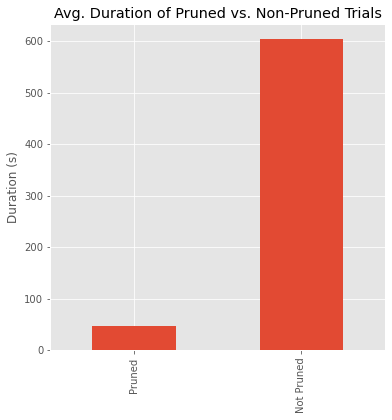

In [36]:
trials = get_study("50K-alex-with-lr-and-gamma").trials_dataframe()

fig,ax = plt.subplots(figsize=(6, 6))

trial_durations = pd.Series({
    "Pruned": trials[trials.state == "PRUNED"].duration.dt.seconds.mean(),
    "Not Pruned": trials[trials.state != 'PRUNED'].duration.dt.seconds.mean(),
})

trial_durations.plot(kind='bar', ax=ax)
plt.title("Avg. Duration of Pruned vs. Non-Pruned Trials")
plt.ylabel("Duration (s)")

# plt.fig.figsize((5, 5))
plt.savefig("pruning-duration.png")

In [25]:
def plot_param_values(study, name):
    df = study.trials_dataframe()
    fig,ax = plt.subplots()
    for param in ['num_layers', 'num_nodes']:
        ax.plot(df.number, df[f'params_{param}'], label=param)
    plt.title(f"Parameter Values during Optimization, {name}")

    ax2 = ax.twinx()
    ax2.set_yscale("log")
    ax2.plot(df.number, df["params_lr"], label="lr", color="green")

    ax.legend(loc=(.85, .85))
    ax2.legend(loc=(.9, .8))
    
    name_slug = name.lower().replace(" ", "-")
    filename = f"param-values-{name_slug}.png"
    plt.savefig(filename)
    print("Saved to", filename)

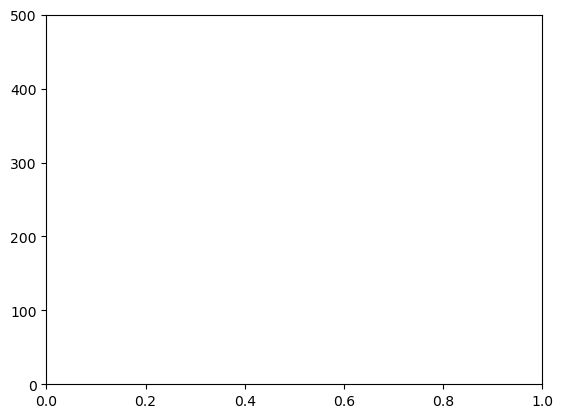

In [30]:
cmaes_study = get_study("cmaes-oc20-3k")
viz.plot_optimization_history(cmaes_study)

Saved to param-values-cma-es.png


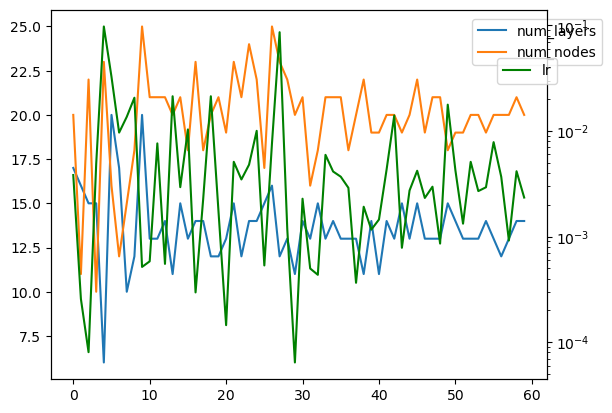

In [24]:
plot_param_values(cmaes_study, "Cma-Es")

In [27]:
tpe_study = get_study("tpe-oc20-3k")
viz.plot_optimization_history(tpe_study)

Saved to param-values-tpe.png


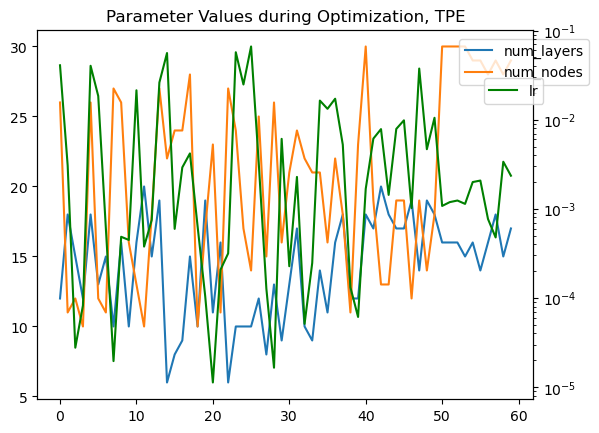

In [16]:
plot_param_values(tpe_study, "TPE")

(0.0, 500.0)

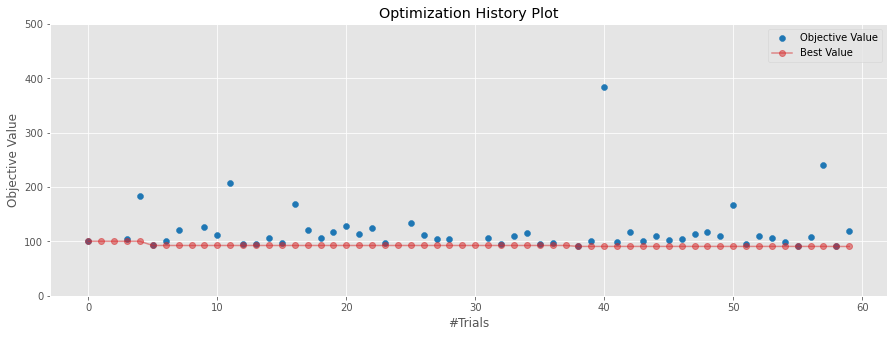

In [14]:
rand_study = get_study("random-oc20-3k")
viz.plot_optimization_history(rand_study)
plt.ylim(0, 500)

Saved to param-values-random.png


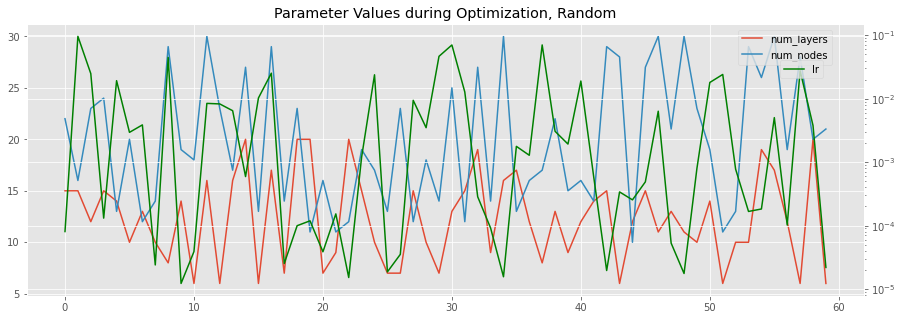

In [29]:
plot_param_values(rand_study, "Random")

## Big Hyperparameter Search

In [8]:
for _ in range(5):
    ampopt.run_pace_tuning_job(
        study="50K-alex-with-lr-and-gamma",
        data="../data/oc20_50k_alex.lmdb",
        trials=30,
        epochs=250,
        params=format_params(
            dropout_rate=0.0,
        ),
        pruner="None",
    )

mysql running, job ID: 115629
115651.sched-pace-ice.pace.gatech.edu
mysql running, job ID: 115629
115652.sched-pace-ice.pace.gatech.edu
mysql running, job ID: 115629
115653.sched-pace-ice.pace.gatech.edu
mysql running, job ID: 115629
115654.sched-pace-ice.pace.gatech.edu
mysql running, job ID: 115629
115655.sched-pace-ice.pace.gatech.edu


In [10]:
best_trial = get_study("50k-alex-with-lr-and-gamma").best_trial
print(best_trial.params)

{'gamma': 0.999565, 'lr': 0.000866342, 'num_layers': 11, 'num_nodes': 23}


In [ ]:
ampopt.eval_score(
    epochs=1_000,
    train_fname="../data/oc20_50k_alex.lmdb",
    valid_fname="../data/oc20_3k_train.traj",
    dropout_rate=0.0,
    **best_trial.params,
)

result: 62.59552522676968